In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wine_data = pd.read_csv('wine.csv')

Asumiendo que 'target' es la etiqueta original, la eliminamos para el análisis de clustering

In [2]:
wine_features = wine_data.drop('target', axis=1)

Calcular el WCSS para k de 1 a 10

In [7]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(wine_features)
    wcss.append(kmeans.inertia_)

Graficar el WCSS para determinar el número óptimo de clusters

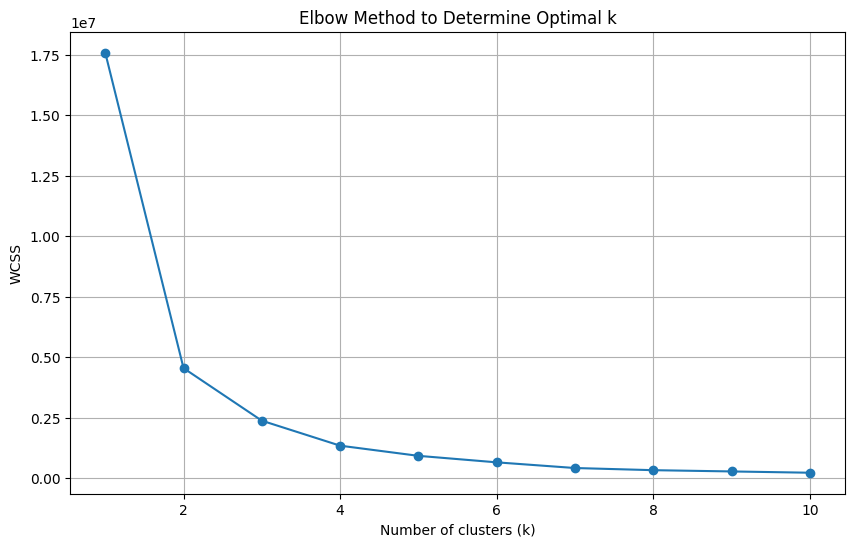

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Buscamos un punto en el gráfico donde el cambio en el WCSS deje de ser significativo, es decir, donde la curva empieza a aplanarse. Este punto representa un balance entre la maximización de la diferencia entre los clusters y la minimización de la variación dentro de cada cluster.

En el gráfico que generamos, el punto en el que el cambio en el WCSS comienza a disminuir significativamente (y por ende, donde la curva comienza a aplanarse) ocurre aproximadamente en k=3.

Ademas es una elección plausible sabiendo que los vinos se suelen clasificar en Tintos, Blancos y Rosados.

Aplicar K-means con el número óptimo de clusters (k=3 en este caso)

In [10]:
kmeans_optimal = KMeans(n_clusters=3, n_init=10,random_state=42)
wine_data['cluster'] = kmeans_optimal.fit_predict(wine_features)

Obtener las diferentes clases de vinos.

In [11]:
print(wine_data['cluster'].value_counts())

cluster
0    69
2    62
1    47
Name: count, dtype: int64
